# 各类排序算法性能对比

### 排序算法复杂度整理

| 排序算法 | English | 时 间 复 杂 度 | 空 间 复 杂 度 |
| :---: | :---: | :---: | :---: |
| 冒泡排序 | BubbleSort | $O(n^2)$        | $O(1)$          |
| 选择排序 | SelectSort | $O(n^2)$        | $O(1)$          |
| 插入排序 | InsertSort | $O(n^2)$        | $O(1)$          |
| 希尔排序 | ShellSort  | $O(n^{1.5})$       | $O(1)$          |
| 快速排序 | QuickSort  | $O(Nlog_2N)$ | $O(1)$ |
| 归并排序 | MergeSort  | $O(Nlog_2N)$ | $O(Nlog_2N)$          |
| 堆排序   | HeapSort   | $O(n^2)$ | $O(1)$          |

### 初始化

In [1]:
import random
import copy, time
from sort import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 待测试排序算法
# Python: SortFunc
# C:      SortFuncC

### 基本排序测试 (Python)

In [2]:
print("Python Sort Test")
RandList = GenRandNum(1000)
StdList = SortStd(copy.copy(RandList))
for cSort in SortFunc:
    SortTest(cSort, copy.copy(RandList), StdList)

Python Sort Test
[Function SortStd] Time Duration:0.001000s
[Class   BubbleSort]: Time Duration: 0.540051s, Check: True SwapCount =     251281, SearchCount =     999000
[Class   SelectSort]: Time Duration: 0.200015s, Check: True SwapCount =        995, SearchCount =     499500
[Class   InsertSort]: Time Duration: 0.129001s, Check: True SwapCount =          0, SearchCount =     252280
[Class    QuickSort]: Time Duration: 0.007002s, Check: True SwapCount =       3062, SearchCount =      10607
[Class   QuickSort2]: Time Duration: 0.006999s, Check: True SwapCount =       1899, SearchCount =      10938
[Class    ShellSort]: Time Duration: 0.013001s, Check: True SwapCount =          0, SearchCount =      15469
[Class    MergeSort]: Time Duration: 0.006001s, Check: True SwapCount =          0, SearchCount =       9708
[Class     HeapSort]: Time Duration: 0.284022s, Check: True SwapCount =       9051, SearchCount =     499500


### MonteCarlo测试

***创建测试函数 (Both For C/Python Sort)***

In [3]:
def SortTestRep(SortList, SortTestFunc, NumLen = 100, Times = 10):
    # init
    keys = ['Swap','Search','Time']
    keysAvg = ['AvgSwap','AvgSearch','AvgTime']
    TestResult = {}
    for Sort in SortList:
        TestResult[Sort.__name__] = dict.fromkeys(keys+keysAvg)
        for key, keyAvg in zip(keys, keysAvg):
            TestResult[Sort.__name__][key] = []
            TestResult[Sort.__name__][keyAvg] = 0
    
    # run tests
    for i in range(Times):
        RandomNumbers = GenRandNum(NumLen)
        for Sort in SortList:
            result = SortTestFunc(Sort, RandomNumbers, PrintFlag=False)
            for key in keys:
                TestResult[Sort.__name__][key].append(result[key])
    
    # analyse
    for Sort in SortList:
        for key, keyAvg in zip(keys, keysAvg):
            if(TestResult[Sort.__name__][key][0]):
                TestResult[Sort.__name__][keyAvg] = sum(TestResult[Sort.__name__][key])/Times
    
    return TestResult

***测试算法***

In [4]:
# run test (cost a period of time, suggest run once)
TestResult = SortTestRep(SortFunc, SortTest, NumLen = 1000, Times = 10)

In [5]:
# using pandas to analyse
dfTest = pd.DataFrame(TestResult).T
keysToAnalyse = ['AvgSearch','AvgSwap','AvgTime']
dfTestToPrint = dfTest.loc[:,keysToAnalyse]
print(dfTestToPrint)

           AvgSearch AvgSwap     AvgTime
BubbleSort    999000  249703    0.502839
SelectSort    499500   991.8    0.188617
InsertSort    250702       0    0.121707
QuickSort    10947.5  3047.1  0.00710166
QuickSort2   11318.1  1891.7  0.00670018
ShellSort    15683.8       0   0.0135012
MergeSort     9707.3       0  0.00630064
HeapSort      499500  9044.2    0.270823


***作图分析***

In [6]:
def PlotResult(dfTest, keysToAnalyse):
    # parameters
    NumAnalyse = len(keysToAnalyse)
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    bar_width = 0.7
    opacity = 0.4

    # bar plots
    for i,key in zip(range(NumAnalyse),keysToAnalyse):
        data = dfTest.loc[:,key]
        ax = fig.add_subplot(1,NumAnalyse,i+1)
        index = np.arange(len(data))
        rects = plt.bar(index, data, bar_width,
                         alpha=opacity,
                         color='b')
        plt.ylabel(key)
        plt.xticks(index, dfTest.index, rotation=90)
        plt.tight_layout()
    plt.show()

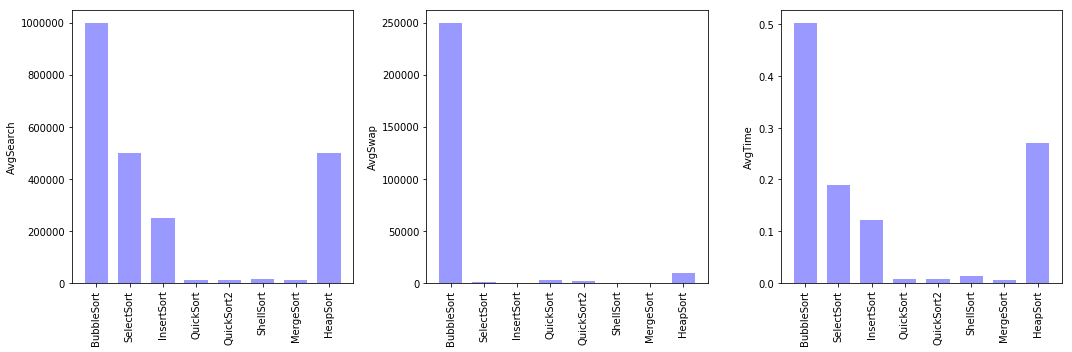

In [7]:
PlotResult(dfTest, keysToAnalyse)

### 优化排序测试 (C Language)

In [8]:
print("C Sort Test")
RandList = GenRandNum(100000)
StdList = SortStd(copy.copy(RandList))
for fSort in SortFuncC:
    SortTestC(fSort, copy.copy(RandList), StdList)

C Sort Test
[Function SortStd] Time Duration:0.197012s
[Func    SortBubble]: Time Duration: 21.094670s, Check: True
[Func    SortSelect]: Time Duration: 2.412185s, Check: True
[Func    SortInsert]: Time Duration: 1.393102s, Check: True
[Func     SortShell]: Time Duration: 0.031993s, Check: True
[Func     SortQuick]: Time Duration: 0.028996s, Check: True
[Func    SortQuick2]: Time Duration: 0.029998s, Check: True
[Func     SortMerge]: Time Duration: 0.256014s, Check: True
[Func      SortHeap]: Time Duration: 6.887538s, Check: True


### MonteCarlo测试  (C Language)

***测试算法***

In [9]:
# run test (cost a period of time, suggest run once)
TestResultC = SortTestRep(SortFuncC, SortTestC, NumLen = 10000, Times = 10)

In [10]:
# using pandas to analyse
dfTestC = pd.DataFrame(TestResultC).T
keysToAnalyse = ['AvgTime']
dfTestToPrintC = dfTestC.loc[:,keysToAnalyse]
print(dfTestToPrintC)

               AvgTime
SortBubble    0.156312
SortSelect   0.0266009
SortInsert   0.0159041
SortShell   0.00289962
SortQuick   0.00280018
SortQuick2  0.00240004
SortMerge    0.0102988
SortHeap     0.0714045


***作图分析***

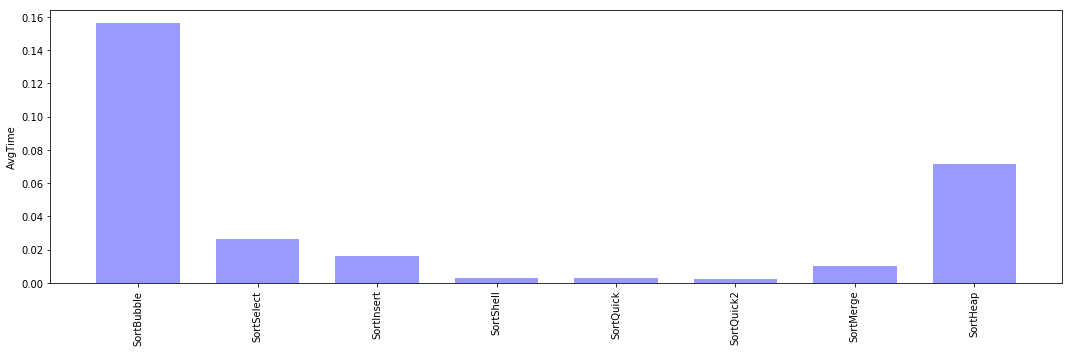

In [11]:
PlotResult(dfTestC, keysToAnalyse)

***Compare of Shell, Quick, Quick+Insert, Merge***

In [12]:
# run test (cost a period of time, suggest run once)
SortFuncC_Ex = [
    sort_lib.SortShell,
    sort_lib.SortQuick,
    sort_lib.SortQuick2,
    sort_lib.SortMerge,
]
TestResultC_Ex = SortTestRep(SortFuncC_Ex, SortTestC, NumLen = 1000000, Times = 10)

In [13]:
dfTestC_Ex = pd.DataFrame(TestResultC_Ex).T
keysToAnalyse = ['AvgTime']
dfTestToPrintC_Ex = dfTestC_Ex.loc[:,keysToAnalyse]
print(dfTestToPrintC_Ex)

             AvgTime
SortShell   0.410726
SortQuick   0.340525
SortQuick2  0.334224
SortMerge   0.463634


***作图分析***

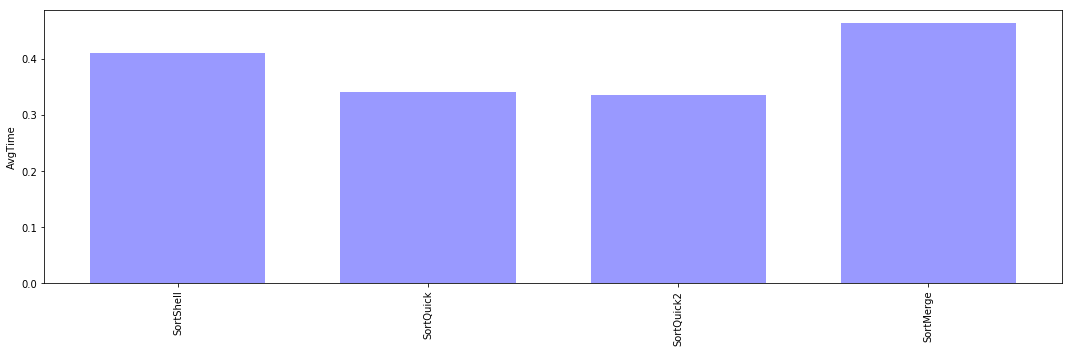

In [14]:
PlotResult(dfTestC_Ex, keysToAnalyse)